In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px # to plot the time series plot
from sklearn import metrics # for the evaluation
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import tensorflow as tf 
import datapane as dp
import altair as alt

In [57]:
def plot_forecasts(history, test, prediction, title='Prediction', ylabel='value', xlabel='time', ts=(500,20)):
    # plot forecasts against actual outcomes
    fill_nan = np.empty(len(history))
    fill_nan[:] = np.nan
    in_nan = np.empty(len(test))
    in_nan[:] = np.nan

    in_seq = np.concatenate((np.array(history), in_nan))
    tar_seq = np.concatenate((fill_nan, np.array(test.copy())))
    predicted_seq = np.concatenate((fill_nan, np.array(prediction.copy())))
    plt.plot(in_seq)
    plt.plot(tar_seq)
    plt.plot(predicted_seq)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.legend(['input_seq', 'target_seq', 'pre_seq'], loc='upper right')
    axes = plt.gca()
    fig_predict = plt.figure(figsize=ts)
    plt.show()

In [58]:
corr_group = {
    'P_SUM': #Var to Predict
        ['S_SUM', # Sum of apparent power S1, S2, S3
        'S_L3', # Apparent power S3 
        'S_L2', # Apparent Power S2
        'S_L1', # Apparent power S1
        'C_phi_L1', #Fund power CosPhi factor L1
        'C_phi_L2', #Fund power CosPhi factor L2
        'P_SUM', # Sum of powers P1, P2, P3
        'P_L1', # Real Power 1
        'P_L2', # Real Power 2
        'P_L3', # Real Power 3
        'Q_SUM', # SUm of fund reactive power
        'Q_L1', #Fundamental Reactive Power Q1
        'Q_L2', #Fundamental Reactive Power Q2
        'Q_L3', #Fundamental Reactive Power Q3
        'I_L1', # Current L1
        'I_L2', # Current L2
        'I_L3'], # Current L3
    'U_L1_N':
        ['U_L1_L2', # Voltage L1_l2
        'U_L3_L1', # Voltage L3_l1
        'U_L3_N', # Voltage L3_N
        'U_L2_L3', # Voltage L2_l3
        'U_L2_N', # Voltage L2_N
        'U_L1_N'], # VOltage L1_N 
    'I_SUM': 
        ['I_SUM'], # Current Sum 
    'F': 
        ['F'], # Measured Freq
    'RealE_SUM':
        ['RealEc_SUM', # Sum of Consumed Energy 
        'RealEc_L1', # Real Energy Consumed L1
        'RealEc_L2', # Real Energy Consumed L2
        'RealEc_L3', # Real Energy Consumed L3
        'RealE_SUM', # Sum of Real Energy 
        'RealE_L2', # Real Energy L2
        'RealE_L3', # Real Energy L3
        'RealE_L1', # Real Energy L1
        'AE_SUM', # Apparent Energy Sum
        'AE_L1', # Apparent Energy L1
        'AE_L2', # Apparent Energy L2
        'AE_L3', # Apparent Energy L3
        'ReacE_L1'], #Reactive Energy L1
    'C_phi_L3': 
        ['C_phi_L3'] #Fund power CosPhi factor L3
}

<AxesSubplot:title={'center':'C_phi_L3'}>

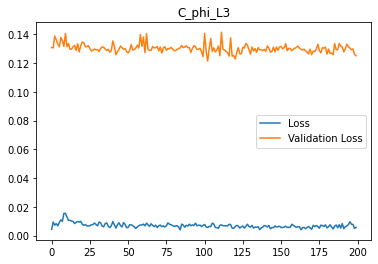

In [71]:

hist = pd.read_csv('results/Spec_Norm_LSTM_RealE_Sum_history.csv',index_col='Unnamed: 0')
hist.plot(title=k)

In [60]:
df = pd.read_csv("data/mongo_data.csv", index_col='ts')
df = df.drop('Unnamed: 0', 1)
#Remove cols with the same value

def unique_cols(df):
    a = df.to_numpy() # df.values (pandas<0.24)
    return (a[0] == a).all(0)

df = df.loc[:,np.invert(unique_cols(df))]
print(df.shape)
df.tail()

C:\Users\pedro\AppData\Local\Temp\ipykernel_1832\468073868.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Unnamed: 0', 1)


(1928755, 39)


,S_SUM,U_L1_L2,I_SUM,F,U_L3_L1,C_phi_L1,U_L3_N,RealEc_L1,RealEc_L2,RealEc_L3,...,S_L3,Q_L1,S_L2,U_L2_N,S_L1,U_L1_N,I_L1,RealEc_SUM,I_L2,I_L3
ts,,,,,,,,,,,,,,,,,,,,,
2022-03-16T11:46:25.931837314Z,144890.16,408.87,1.08,49.97,407.98,0.97,235.64,44933936,43492684,43453100,...,46857.12,10264.62,50062.00,236.46,47971.05,235.85,203.40,131879832,211.72,198.85
2022-03-16T11:46:27.213046140Z,143902.53,409.29,1.12,49.97,406.56,0.99,234.81,44933952,43492700,43453120,...,47984.26,7155.61,46749.76,236.46,49168.52,235.03,209.20,131879880,197.71,204.36
2022-03-16T11:46:28.499715032Z,143457.63,408.75,1.14,49.97,405.88,0.99,234.87,44933968,43492712,43453132,...,46998.51,7665.49,47098.83,236.24,49360.28,234.77,210.25,131879920,199.37,200.11
2022-03-16T11:46:29.814130324Z,144825.58,408.98,1.09,49.97,408.18,0.97,235.72,44933988,43492732,43453148,...,46598.08,10189.86,49460.64,236.48,48766.86,235.93,206.70,131879976,209.15,197.69
2022-03-16T11:46:31.116579462Z,143771.91,409.67,1.14,49.97,406.51,0.98,235.17,44934000,43492744,43453164,...,47383.55,7984.87,47779.66,236.53,48608.71,234.99,206.85,131880016,202.00,201.49


In [64]:
# Average window
df_2 = df.groupby(np.arange(len(df))//300).mean()
print(df_2.shape)
df_2.head()

(6430, 39)


,S_SUM,U_L1_L2,I_SUM,F,U_L3_L1,C_phi_L1,U_L3_N,RealEc_L1,RealEc_L2,RealEc_L3,...,S_L3,Q_L1,S_L2,U_L2_N,S_L1,U_L1_N,I_L1,RealEc_SUM,I_L2,I_L3
0,146181.497067,412.265100,1.050200,50.015233,410.721600,0.984600,237.601033,2.588118e+07,2.517733e+07,2.503916e+07,...,47924.306000,7961.648367,48890.451300,238.190133,49366.739767,237.407967,207.947933,7.609777e+07,205.264167,201.709933
1,127963.927467,411.513767,1.088967,50.009267,410.010400,0.981200,237.194833,2.588593e+07,2.518200e+07,2.504372e+07,...,41894.930633,7478.237333,42489.596800,237.751433,43579.399933,236.946933,183.937633,7.611176e+07,178.727400,176.645533
2,140777.695833,413.105900,1.136233,50.012367,411.721867,0.982667,238.178433,2.589027e+07,2.518626e+07,2.504788e+07,...,46279.492833,7949.253833,46949.952167,238.665700,47548.250433,237.865133,199.910767,7.612452e+07,196.728400,194.319067
3,122484.540533,410.887433,1.027900,50.012867,409.470767,0.976200,236.948667,2.592408e+07,2.521975e+07,2.508041e+07,...,39914.266833,7750.272633,40911.281233,237.479533,41658.991733,236.601300,176.163867,7.622434e+07,172.350600,168.531267
4,142202.177967,411.367667,1.046633,50.009900,410.050133,0.982433,237.300967,2.594313e+07,2.523864e+07,2.509874e+07,...,46576.881967,8212.587200,47601.273233,237.753833,48024.022367,236.892100,202.744967,7.628061e+07,200.231000,196.295600


In [65]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(df_2)
scaled_df = pd.DataFrame(d, columns=df_2.columns, index=df_2.index)
scaled_df.head()

,S_SUM,U_L1_L2,I_SUM,F,U_L3_L1,C_phi_L1,U_L3_N,RealEc_L1,RealEc_L2,RealEc_L3,...,S_L3,Q_L1,S_L2,U_L2_N,S_L1,U_L1_N,I_L1,RealEc_SUM,I_L2,I_L3
0,0.971144,0.564975,0.768299,0.642699,0.533551,0.994010,0.588342,0.000000,0.000000,0.000000,...,0.955981,0.775991,0.986598,0.546675,0.964534,0.561884,0.966573,0.000000,0.975159,0.950253
1,0.850049,0.534566,0.809383,0.606748,0.504668,0.990577,0.559993,0.000249,0.000255,0.000247,...,0.835514,0.728900,0.857430,0.515906,0.851460,0.528944,0.854969,0.000251,0.849089,0.831982
2,0.935224,0.599005,0.859474,0.625427,0.574173,0.992058,0.628641,0.000477,0.000488,0.000474,...,0.923118,0.774784,0.947439,0.580030,0.929004,0.594548,0.929215,0.000480,0.934608,0.915378
3,0.813627,0.509216,0.744666,0.628439,0.482753,0.985530,0.542812,0.002252,0.002316,0.002240,...,0.795940,0.755400,0.825580,0.496836,0.813939,0.504249,0.818836,0.002269,0.818795,0.793693
4,0.944693,0.528653,0.764519,0.610564,0.506282,0.991823,0.567400,0.003252,0.003348,0.003236,...,0.929059,0.800436,0.960583,0.516074,0.938300,0.525026,0.942389,0.003278,0.951247,0.924704


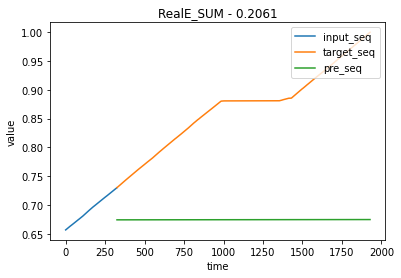

<Figure size 36000x1440 with 0 Axes>

In [70]:
from sklearn.metrics import mean_squared_error

vals = scaled_df.shape[0]
history_window = int(0.3*vals)
fc = pd.read_csv('results/Spec_Norm_LSTMRealE_SUMpredict.csv',index_col='Unnamed: 0').values[:,0]
prediction_window = len(fc)
hist = scaled_df['RealE_SUM'].values[-history_window:-prediction_window]
test = scaled_df['RealE_SUM'].values[-prediction_window:]
rmse = np.sqrt(mean_squared_error(test, fc))
plot_forecasts(hist, test, fc, title=f"RealE_SUM - {rmse:.4f}", ts=(500,20))


In [ ]:
pred = pd.read_csv("results/PCA_LSTM40_Drop_60secs_MSE_prediction.csv", index_col='Unnamed: 0').transpose()
fc = pred.values
for i in range(len(cols)):
    rmse = np.sqrt(mean_squared_error(test[:,i], fc[:,i]))
    print("%.4f" % rmse)
